# Multiclass classification

* We just solved a binary classification problem in the previous challenge. 
* What about a **multiclass classification task**?

🎯 Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe how this model could easily overfit... !

## (1) Create a `Blobs` dataset

📚 The **`make_blobs`** function from Sklearn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) allows you to generate: 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

💡 There is also the `random_state` argument that allows us to create the data deterministically, in order to reproduce the same data.


❓ Based on the documentation:

👽 Generate a ***blobs*** dataset with:
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

🔮 Select a `random_state` equal to 1.

📏 Print the shape and check that it corresponds to (1200, 8) for `X` and (1200,) for `y` ❓

In [1]:
# YOUR CODE HERE
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1200, centers=7, n_features=8, cluster_std=8, random_state=1)




❓ Use _matplotlib_ to draw a scatterplot of two (arbitrary) dimensions of this blobs dataset. Each dot should be colored with the category it belongs to. ❓

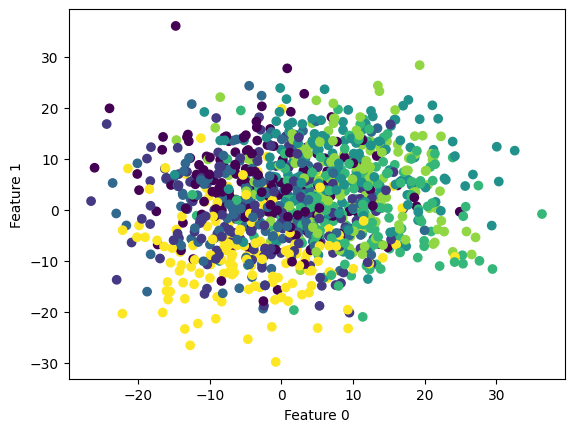

In [2]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

❓ Repeat the operation on other dimensions. You should see visually that the data points are not easily separable ❓

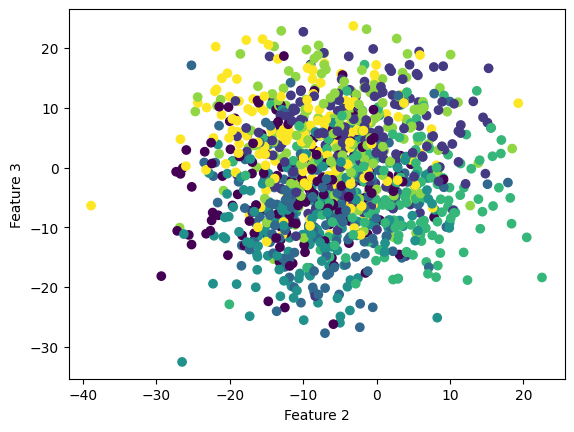

In [3]:
# YOUR CODE HERE
plt.scatter(X[:, 2], X[:, 3], c=y)
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')
plt.show()

## (2) Encoding the target of a multi-class classification problem

👉 For the moment, the target `y` is a list of integers,  corresponding to the category of the input data. It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

🧑🏻‍🏫 However, **`for categorical problems in Tensorflow.Keras, the target/output should be encoded`** in the following way:

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

where:
* the number of rows is equal to the number of observations
* the number of columns is equal to the number of different categories

👉 Each column corresponds to a category. 

👉 Each row corresponds to a target, the 1 being the category the input data belongs to.

You can view a row as a vector of probabilities.

```
Example:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

means that for this given row, there is a 100% chance that the row belongs to the Cat 3
```

--- 

💡 To transform `y` to categories, use **to_categorical** function from Tensorflow/Keras.


<detail>
    <summary><i> Is there an analogy between the _to_categorical_ of Tensorflow/Keras and the _OneHotEncoder_ of Scikit-Learn ?</i></summary>
    

Yes! *to_categorical* works a bit like the OneHotEncoder in Sklearn but instead of encoding a categorical feature, we are now encoding a categorical target.
    
</details>

---

❓ **Encoding the categorical target**:  Print `y`, then apply  *to_categorical* to *`y`* and store the *categorized version of y* into a variable called `y_cat`. ❓

In [4]:
# YOUR CODE HERE
import numpy as np
from tensorflow.keras.utils import to_categorical

print("Original y:")
print(y)

y_cat = to_categorical(y)
print("Categorical y:")
print(y_cat)


Original y:
[2 2 5 ... 1 3 0]
Categorical y:
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


## (3) Neural Network for a Multiclass Classification Task

❓ **Hold-out method**: Split the dataset $X$ and $y_{cat}$ into a _train_ and _test_ set (size: 70/30%)

Remark: Please call the variables `X_train`, `X_test`, `y_train`, and `y_test` ❓

In [5]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=0)

In Deep Learning, as in any Machine Learning algorithm, your numerical features should be scaled.

❓ **Scaling**: Fit a Sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the training set and transform both your train set and test set ❓

In [6]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


❓ **Initializing a model**: Complete the following function to build/initialize a model that has: 
- a first layer with:
    - 50 neurons
    - the `relu` activation
    - the correct input dimension
- a output layer:
    - designed for a multiclass classification task 
    - which outputs probabilities of belonging to each class ❓

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    ############################# 
    
    model = models.Sequential()
    model.add(layers.Dense(50, activation='relu', input_dim=8)) 
    model.add(layers.Dense(7, activation='softmax'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
                  optimizer='adam', 
                  metrics=['accuracy']) 

    return model 


model = initialize_model()

❓  How many parameters (a.k.a. weights) are there in the model ❓

In [8]:
# YOUR CODE HERE
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 7)                 357       
                                                                 
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________


❓ **Fitting the model**: Fit your model on the train data with 50 epochs and plot the history ❓

In [9]:
# YOUR CODE HERE
model.fit(X_train_scaled, y_train, epochs=50, batch_size = 16)

Epoch 1/50
53/53 [==============================] - 0s 424us/step - loss: 1.7966 - accuracy: 0.2619
Epoch 2/50
 1/53 [..............................] - ETA: 0s - loss: 1.5511 - accuracy: 0.4375

2023-03-06 13:56:44.285987: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


53/53 [==============================] - 0s 407us/step - loss: 1.4646 - accuracy: 0.5179
Epoch 3/50
53/53 [==============================] - 0s 436us/step - loss: 1.2374 - accuracy: 0.6357
Epoch 4/50
53/53 [==============================] - 0s 410us/step - loss: 1.0819 - accuracy: 0.6845
Epoch 5/50
53/53 [==============================] - 0s 419us/step - loss: 0.9764 - accuracy: 0.7012
Epoch 6/50
53/53 [==============================] - 0s 396us/step - loss: 0.9066 - accuracy: 0.7000
Epoch 7/50
53/53 [==============================] - 0s 407us/step - loss: 0.8586 - accuracy: 0.7119
Epoch 8/50
53/53 [==============================] - 0s 399us/step - loss: 0.8278 - accuracy: 0.7143
Epoch 9/50
53/53 [==============================] - 0s 407us/step - loss: 0.8036 - accuracy: 0.7095
Epoch 10/50
53/53 [==============================] - 0s 401us/step - loss: 0.7876 - accuracy: 0.7143
Epoch 11/50
53/53 [==============================] - 0s 404us/step - loss: 0.7729 - accuracy: 0.7119
Epoch 12/

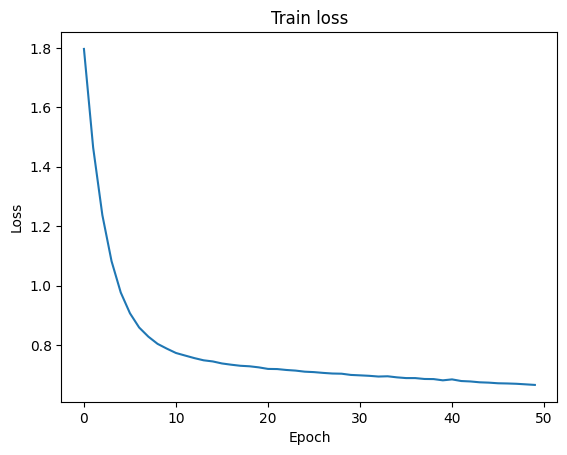

In [10]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()
plot_history(model.history)

❓ **Evaluation**:  Evaluate your model on the test set and print the accuracy ❓

In [11]:
# YOUR CODE HERE
model.evaluate(X_test_scaled, y_test)[1]



12/12 [==============================] - 0s 484us/step - loss: 0.9194 - accuracy: 0.6917


0.6916666626930237

❓ 🤔 Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give? Store this baseline score in the `accuracy_baseline` variable. ❓

In [12]:
accuracy_baseline = 1/7
accuracy_baseline

0.14285714285714285

🧪 **Test your code**

In [13]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/jingxuanzhu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/jingxuanzhu/code/jingxuan091/data-multiclass-classification/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_baseline.py::TestBaseline::test_accuracy PASSED                     [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master



❗ 👀 Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stop it so soon ❓❗

❓ Let's re-initialize and re-run the model with 1000 epochs this time, and again plot the history. ❓

In [14]:
# YOUR CODE HERE
model = initialize_model()
model.fit(X_train_scaled, y_train, epochs=1000, batch_size = 16)

Epoch 1/1000
53/53 [==============================] - 0s 443us/step - loss: 1.8679 - accuracy: 0.2274
Epoch 2/1000
53/53 [==============================] - 0s 419us/step - loss: 1.5373 - accuracy: 0.4536
Epoch 3/1000
53/53 [==============================] - 0s 431us/step - loss: 1.2953 - accuracy: 0.6060
Epoch 4/1000
53/53 [==============================] - 0s 403us/step - loss: 1.1218 - accuracy: 0.6631
Epoch 5/1000
53/53 [==============================] - 0s 409us/step - loss: 1.0017 - accuracy: 0.6810
Epoch 6/1000
53/53 [==============================] - 0s 396us/step - loss: 0.9228 - accuracy: 0.6869
Epoch 7/1000
53/53 [==============================] - 0s 408us/step - loss: 0.8709 - accuracy: 0.6952
Epoch 8/1000
53/53 [==============================] - 0s 405us/step - loss: 0.8361 - accuracy: 0.7048
Epoch 9/1000
53/53 [==============================] - 0s 398us/step - loss: 0.8111 - accuracy: 0.7024
Epoch 10/1000
53/53 [==============================] - 0s 400us/step - loss: 0.794

53/53 [==============================] - 0s 408us/step - loss: 0.6285 - accuracy: 0.7667
Epoch 81/1000
53/53 [==============================] - 0s 410us/step - loss: 0.6269 - accuracy: 0.7655
Epoch 82/1000
53/53 [==============================] - 0s 389us/step - loss: 0.6254 - accuracy: 0.7619
Epoch 83/1000
53/53 [==============================] - 0s 395us/step - loss: 0.6254 - accuracy: 0.7679
Epoch 84/1000
53/53 [==============================] - 0s 400us/step - loss: 0.6254 - accuracy: 0.7631
Epoch 85/1000
53/53 [==============================] - 0s 829us/step - loss: 0.6234 - accuracy: 0.7595
Epoch 86/1000
53/53 [==============================] - 0s 395us/step - loss: 0.6234 - accuracy: 0.7667
Epoch 87/1000
53/53 [==============================] - 0s 399us/step - loss: 0.6224 - accuracy: 0.7655
Epoch 88/1000
53/53 [==============================] - 0s 399us/step - loss: 0.6189 - accuracy: 0.7679
Epoch 89/1000
53/53 [==============================] - 0s 395us/step - loss: 0.6169 - a

53/53 [==============================] - 0s 394us/step - loss: 0.5532 - accuracy: 0.7869
Epoch 160/1000
53/53 [==============================] - 0s 392us/step - loss: 0.5510 - accuracy: 0.7905
Epoch 161/1000
53/53 [==============================] - 0s 391us/step - loss: 0.5504 - accuracy: 0.7893
Epoch 162/1000
53/53 [==============================] - 0s 396us/step - loss: 0.5493 - accuracy: 0.7940
Epoch 163/1000
53/53 [==============================] - 0s 388us/step - loss: 0.5490 - accuracy: 0.7905
Epoch 164/1000
53/53 [==============================] - 0s 391us/step - loss: 0.5480 - accuracy: 0.7893
Epoch 165/1000
53/53 [==============================] - 0s 394us/step - loss: 0.5463 - accuracy: 0.7905
Epoch 166/1000
53/53 [==============================] - 0s 379us/step - loss: 0.5467 - accuracy: 0.7952
Epoch 167/1000
53/53 [==============================] - 0s 393us/step - loss: 0.5457 - accuracy: 0.7952
Epoch 168/1000
53/53 [==============================] - 0s 387us/step - loss: 0

53/53 [==============================] - 0s 386us/step - loss: 0.4931 - accuracy: 0.8167
Epoch 238/1000
53/53 [==============================] - 0s 408us/step - loss: 0.4912 - accuracy: 0.8179
Epoch 239/1000
53/53 [==============================] - 0s 388us/step - loss: 0.4890 - accuracy: 0.8226
Epoch 240/1000
53/53 [==============================] - 0s 389us/step - loss: 0.4894 - accuracy: 0.8167
Epoch 241/1000
53/53 [==============================] - 0s 381us/step - loss: 0.4890 - accuracy: 0.8179
Epoch 242/1000
53/53 [==============================] - 0s 389us/step - loss: 0.4877 - accuracy: 0.8238
Epoch 243/1000
53/53 [==============================] - 0s 387us/step - loss: 0.4874 - accuracy: 0.8214
Epoch 244/1000
53/53 [==============================] - 0s 386us/step - loss: 0.4891 - accuracy: 0.8250
Epoch 245/1000
53/53 [==============================] - 0s 404us/step - loss: 0.4859 - accuracy: 0.8226
Epoch 246/1000
53/53 [==============================] - 0s 387us/step - loss: 0

53/53 [==============================] - 0s 403us/step - loss: 0.4453 - accuracy: 0.8440
Epoch 316/1000
53/53 [==============================] - 0s 407us/step - loss: 0.4453 - accuracy: 0.8476
Epoch 317/1000
53/53 [==============================] - 0s 398us/step - loss: 0.4450 - accuracy: 0.8405
Epoch 318/1000
53/53 [==============================] - 0s 389us/step - loss: 0.4435 - accuracy: 0.8417
Epoch 319/1000
53/53 [==============================] - 0s 382us/step - loss: 0.4434 - accuracy: 0.8393
Epoch 320/1000
53/53 [==============================] - 0s 387us/step - loss: 0.4444 - accuracy: 0.8417
Epoch 321/1000
53/53 [==============================] - 0s 395us/step - loss: 0.4441 - accuracy: 0.8405
Epoch 322/1000
53/53 [==============================] - 0s 404us/step - loss: 0.4408 - accuracy: 0.8381
Epoch 323/1000
53/53 [==============================] - 0s 415us/step - loss: 0.4411 - accuracy: 0.8417
Epoch 324/1000
53/53 [==============================] - 0s 413us/step - loss: 0

53/53 [==============================] - 0s 398us/step - loss: 0.4045 - accuracy: 0.8571
Epoch 394/1000
53/53 [==============================] - 0s 387us/step - loss: 0.4039 - accuracy: 0.8571
Epoch 395/1000
53/53 [==============================] - 0s 437us/step - loss: 0.4059 - accuracy: 0.8536
Epoch 396/1000
53/53 [==============================] - 0s 389us/step - loss: 0.4049 - accuracy: 0.8583
Epoch 397/1000
53/53 [==============================] - 0s 396us/step - loss: 0.4038 - accuracy: 0.8560
Epoch 398/1000
53/53 [==============================] - 0s 412us/step - loss: 0.4021 - accuracy: 0.8571
Epoch 399/1000
53/53 [==============================] - 0s 400us/step - loss: 0.4041 - accuracy: 0.8619
Epoch 400/1000
53/53 [==============================] - 0s 393us/step - loss: 0.4035 - accuracy: 0.8536
Epoch 401/1000
53/53 [==============================] - 0s 387us/step - loss: 0.4020 - accuracy: 0.8571
Epoch 402/1000
53/53 [==============================] - 0s 388us/step - loss: 0

53/53 [==============================] - 0s 398us/step - loss: 0.3712 - accuracy: 0.8643
Epoch 472/1000
53/53 [==============================] - 0s 388us/step - loss: 0.3705 - accuracy: 0.8655
Epoch 473/1000
53/53 [==============================] - 0s 394us/step - loss: 0.3698 - accuracy: 0.8643
Epoch 474/1000
53/53 [==============================] - 0s 400us/step - loss: 0.3713 - accuracy: 0.8667
Epoch 475/1000
53/53 [==============================] - 0s 383us/step - loss: 0.3702 - accuracy: 0.8643
Epoch 476/1000
53/53 [==============================] - 0s 399us/step - loss: 0.3698 - accuracy: 0.8607
Epoch 477/1000
53/53 [==============================] - 0s 395us/step - loss: 0.3687 - accuracy: 0.8643
Epoch 478/1000
53/53 [==============================] - 0s 386us/step - loss: 0.3710 - accuracy: 0.8619
Epoch 479/1000
53/53 [==============================] - 0s 384us/step - loss: 0.3682 - accuracy: 0.8726
Epoch 480/1000
53/53 [==============================] - 0s 372us/step - loss: 0

53/53 [==============================] - 0s 391us/step - loss: 0.3440 - accuracy: 0.8821
Epoch 550/1000
53/53 [==============================] - 0s 392us/step - loss: 0.3449 - accuracy: 0.8798
Epoch 551/1000
53/53 [==============================] - 0s 389us/step - loss: 0.3438 - accuracy: 0.8821
Epoch 552/1000
53/53 [==============================] - 0s 394us/step - loss: 0.3419 - accuracy: 0.8750
Epoch 553/1000
53/53 [==============================] - 0s 380us/step - loss: 0.3418 - accuracy: 0.8750
Epoch 554/1000
53/53 [==============================] - 0s 370us/step - loss: 0.3453 - accuracy: 0.8774
Epoch 555/1000
53/53 [==============================] - 0s 392us/step - loss: 0.3413 - accuracy: 0.8786
Epoch 556/1000
53/53 [==============================] - 0s 394us/step - loss: 0.3411 - accuracy: 0.8833
Epoch 557/1000
53/53 [==============================] - 0s 388us/step - loss: 0.3404 - accuracy: 0.8821
Epoch 558/1000
53/53 [==============================] - 0s 393us/step - loss: 0

53/53 [==============================] - 0s 390us/step - loss: 0.3186 - accuracy: 0.8917
Epoch 628/1000
53/53 [==============================] - 0s 396us/step - loss: 0.3177 - accuracy: 0.8940
Epoch 629/1000
53/53 [==============================] - 0s 402us/step - loss: 0.3185 - accuracy: 0.8905
Epoch 630/1000
53/53 [==============================] - 0s 393us/step - loss: 0.3193 - accuracy: 0.8905
Epoch 631/1000
53/53 [==============================] - 0s 392us/step - loss: 0.3208 - accuracy: 0.8893
Epoch 632/1000
53/53 [==============================] - 0s 379us/step - loss: 0.3169 - accuracy: 0.8917
Epoch 633/1000
53/53 [==============================] - 0s 403us/step - loss: 0.3184 - accuracy: 0.8952
Epoch 634/1000
53/53 [==============================] - 0s 398us/step - loss: 0.3163 - accuracy: 0.9012
Epoch 635/1000
53/53 [==============================] - 0s 388us/step - loss: 0.3158 - accuracy: 0.8929
Epoch 636/1000
53/53 [==============================] - 0s 415us/step - loss: 0

53/53 [==============================] - 0s 400us/step - loss: 0.2958 - accuracy: 0.9012
Epoch 706/1000
53/53 [==============================] - 0s 390us/step - loss: 0.2963 - accuracy: 0.8964
Epoch 707/1000
53/53 [==============================] - 0s 383us/step - loss: 0.2958 - accuracy: 0.9060
Epoch 708/1000
53/53 [==============================] - 0s 386us/step - loss: 0.2930 - accuracy: 0.9060
Epoch 709/1000
53/53 [==============================] - 0s 376us/step - loss: 0.2944 - accuracy: 0.8988
Epoch 710/1000
53/53 [==============================] - 0s 394us/step - loss: 0.2941 - accuracy: 0.9024
Epoch 711/1000
53/53 [==============================] - 0s 387us/step - loss: 0.2957 - accuracy: 0.9024
Epoch 712/1000
53/53 [==============================] - 0s 380us/step - loss: 0.2947 - accuracy: 0.9071
Epoch 713/1000
53/53 [==============================] - 0s 379us/step - loss: 0.2924 - accuracy: 0.9048
Epoch 714/1000
53/53 [==============================] - 0s 384us/step - loss: 0

53/53 [==============================] - 0s 388us/step - loss: 0.2749 - accuracy: 0.9083
Epoch 784/1000
53/53 [==============================] - 0s 393us/step - loss: 0.2758 - accuracy: 0.9155
Epoch 785/1000
53/53 [==============================] - 0s 389us/step - loss: 0.2752 - accuracy: 0.9107
Epoch 786/1000
53/53 [==============================] - 0s 382us/step - loss: 0.2766 - accuracy: 0.9131
Epoch 787/1000
53/53 [==============================] - 0s 395us/step - loss: 0.2735 - accuracy: 0.9119
Epoch 788/1000
53/53 [==============================] - 0s 392us/step - loss: 0.2729 - accuracy: 0.9179
Epoch 789/1000
53/53 [==============================] - 0s 390us/step - loss: 0.2735 - accuracy: 0.9143
Epoch 790/1000
53/53 [==============================] - 0s 387us/step - loss: 0.2722 - accuracy: 0.9143
Epoch 791/1000
53/53 [==============================] - 0s 376us/step - loss: 0.2736 - accuracy: 0.9131
Epoch 792/1000
53/53 [==============================] - 0s 391us/step - loss: 0

53/53 [==============================] - 0s 389us/step - loss: 0.2530 - accuracy: 0.9274
Epoch 862/1000
53/53 [==============================] - 0s 385us/step - loss: 0.2525 - accuracy: 0.9226
Epoch 863/1000
53/53 [==============================] - 0s 398us/step - loss: 0.2512 - accuracy: 0.9226
Epoch 864/1000
53/53 [==============================] - 0s 394us/step - loss: 0.2522 - accuracy: 0.9298
Epoch 865/1000
53/53 [==============================] - 0s 386us/step - loss: 0.2522 - accuracy: 0.9238
Epoch 866/1000
53/53 [==============================] - 0s 373us/step - loss: 0.2524 - accuracy: 0.9238
Epoch 867/1000
53/53 [==============================] - 0s 388us/step - loss: 0.2519 - accuracy: 0.9262
Epoch 868/1000
53/53 [==============================] - 0s 385us/step - loss: 0.2505 - accuracy: 0.9286
Epoch 869/1000
53/53 [==============================] - 0s 389us/step - loss: 0.2500 - accuracy: 0.9286
Epoch 870/1000
53/53 [==============================] - 0s 398us/step - loss: 0

53/53 [==============================] - 0s 406us/step - loss: 0.2305 - accuracy: 0.9262
Epoch 940/1000
53/53 [==============================] - 0s 398us/step - loss: 0.2294 - accuracy: 0.9345
Epoch 941/1000
53/53 [==============================] - 0s 380us/step - loss: 0.2305 - accuracy: 0.9298
Epoch 942/1000
53/53 [==============================] - 0s 388us/step - loss: 0.2305 - accuracy: 0.9274
Epoch 943/1000
53/53 [==============================] - 0s 385us/step - loss: 0.2311 - accuracy: 0.9333
Epoch 944/1000
53/53 [==============================] - 0s 395us/step - loss: 0.2320 - accuracy: 0.9321
Epoch 945/1000
53/53 [==============================] - 0s 385us/step - loss: 0.2308 - accuracy: 0.9369
Epoch 946/1000
53/53 [==============================] - 0s 384us/step - loss: 0.2296 - accuracy: 0.9381
Epoch 947/1000
53/53 [==============================] - 0s 392us/step - loss: 0.2283 - accuracy: 0.9286
Epoch 948/1000
53/53 [==============================] - 0s 383us/step - loss: 0

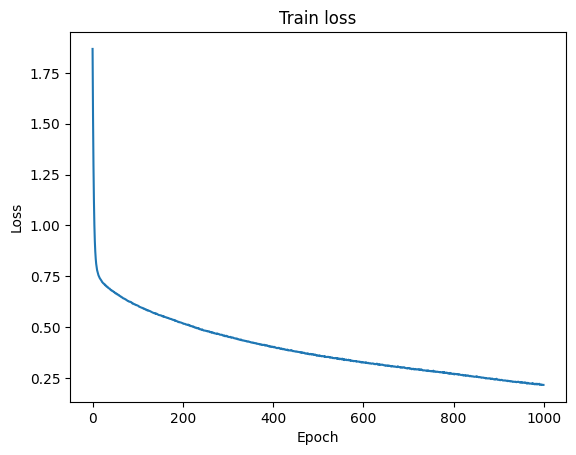

In [15]:
plot_history(model.history)

❓ **When training a model for a longer time...** ❓ 
- What can you say about the new loss? 
- Once again, evaluate your model on the test set and print the accuracy

In [16]:
# YOUR CODE HERE
model.evaluate(X_test_scaled, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 2.5928 - accuracy: 0.6056


[2.592823028564453, 0.605555534362793]

* 😁 The loss computed on the train set seems smaller with 1000 epochs than with 50 epochs. 
* 😟 But the accuracy on the test set is worse with 1000 epochs than with 50 epochs...

❓ What is this phenomenon called ❓

> YOUR ANSWER HERE: overfitting

---

🤔 What should we do to prevent this from happening? 

<details>
    <summary><i>Possible options</i></summary>
    

⚠️ To prevent overfitting from happening in Neural Networks, we can - for example:
1. Choose a ***reasonable number of epochs*** to prevent the neural network from learning too much from noisy data points
2. Create what is called an ***Early Stopping*** criterion, i.e. a way to stop the training earlier than the numbers of epochs set in the _.fit()_ 📆 cf. ***Deep Learning > Optimizers, Loss, Fitting***

</details>    

---


❓ Let's visually check when the test loss starts increasing again in practice.  Run the following command and plot the history❓

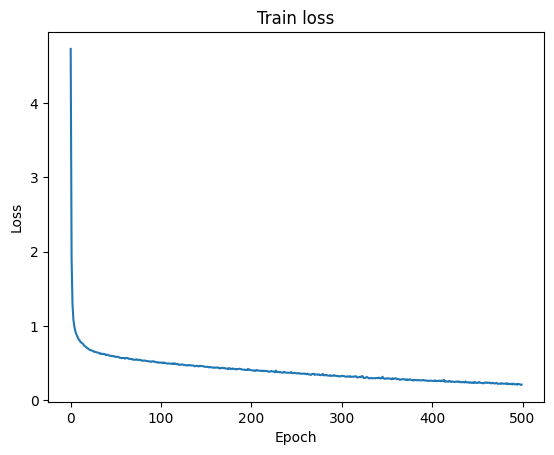

In [20]:
model = initialize_model()

history = model.fit(X_train, 
                    y_train, 
                    validation_data = (X_test, y_test), 
                    epochs = 500, 
                    batch_size = 16,
                    verbose = 0)
plot_history(history)

😱 But wait... aren't we cheating if we use the test set? Yes we are. But again, be patient. In ***Deep Learning - Optimizers, Loss, Fitting***, we will use what we call a ***Validation Set*** to avoid this!

🧘🏻‍♀️ So for now, let's move on to the next questions!

❓ **Evaluating the network**: Plot the values of the loss and accuracy on the <span style="color:blue">train set</span> and on the <span style="color:orange">test set</span>. What can you comment on that ❓ 

In [21]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

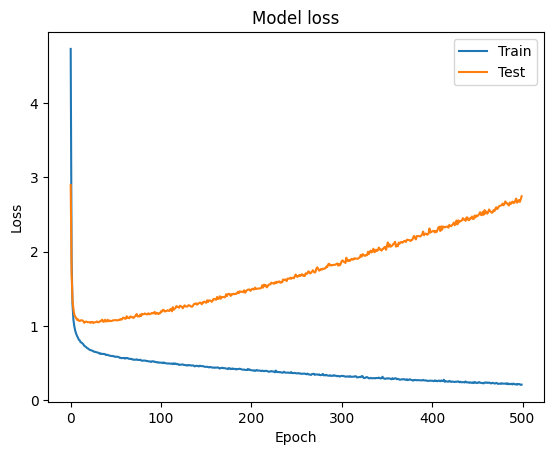

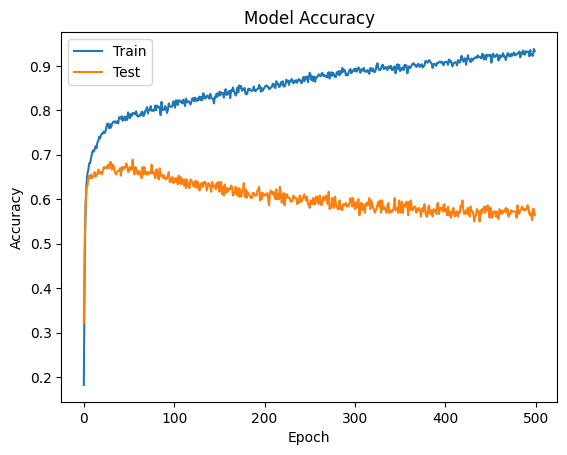

In [22]:
# YOUR CODE HER
plot_loss_accuracy(history)

🤔 Why is our Deep Learning model overfitting so easily?

😳 Think about it, our neural network has to learn ~800 parameters for a simple classification task from a dataset of only 8 features! Besides, we only have ~800 data points in total to fit! The model could almost "learn" the exact class of every point in its train set. 

By contrast, a simple Logistic Regression would have required to learn only 9 parameters to capture the patterns of this blobs dataset! 

😏 Deep Learning is fancy, but can clearly be an overkill and unnecessary option for easy Machine Learning tasks!

⭐️ It will be extremely useful for:
- 📸 Image Processing
- 💹 Time Series
- 🗣 Natural Language Processing

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!